**Name:** <span style="color:red">Maria Cobo and Alba Mas</span>

# SYSTEMS AND NETWORK BIOLOGY - PRACTICAL 5
# Solving the master equation


---

To submit your report, answer the questions below and save the *notebook* clicking on `File > Download as > iPython Notebook` in the menu at the top of the page. **Rename the notebook file** to ''`practicalN_name1_name2.ipynb`'', where `N` is the number of the practical, and `name1` and `name2` are the first surnames of the two team members (only one name if the report is sent individually). Finally, **submit the resulting file through the *Aula Global***.

Remember to label the axes in all the plots.

*IMPORTANT REMINDER: Before the final submission, remember to **reset the kernel** and re-run the whole notebook again to check that it works.*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson
%matplotlib inline

The aim of this practical is to solve the master equation of a birth-death processes in different situations. We will begin with the case of ***constitutive expression***. To that end, we will first write a computer code that calculates, following the steps described in class, the stationary probability density $P(n)$ of a birth-death process with constitutive expression ($C(n)=\alpha$, $D(n)=\delta n$), which we will use as a control in what follows, and plot the resulting distribution $P(n)$. Use the following parameter values: $\alpha=10$, $\delta=1.$

The solution of the master equation for this constitutive expression case can be obtained analytically, and shown to correspond to the Poisson distribution:
$$
p(n)=\frac{\lambda^n}{n!}\exp(-\lambda),
$$
where $\lambda=\alpha/\delta$ is the deterministic solution. Compare the numerical solution that you have obtained with the analytical expression of the Poisson distribution, and with the deterministic equilibrium of the system

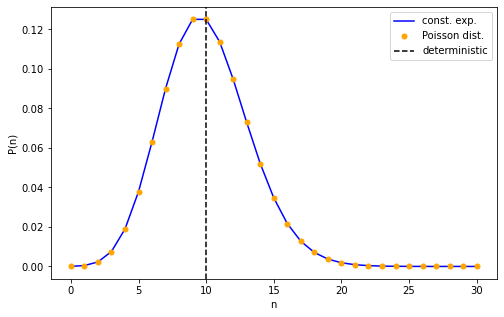

In [18]:
# Given parameters
alpha = 10   # birth rate
delta = 1    # death rate

# Deterministic solution (mean of the Poisson distribution)
lambda_value = alpha / delta

# Define the range for n (population size)
n_max = 30  # Define a maximum n for practical plotting purposes
n_values = np.arange(0, n_max + 1)

# Numerical solution: Calculate the stationary probability P(n) recursively
P_n = np.zeros(n_max + 1)
P_n[0] = 1  # Initial condition P(0)

# Recursive computation of P(n) based on master equation
for n in range(1, n_max + 1):
    P_n[n] = (alpha / (delta * n)) * P_n[n - 1]

# Normalize P(n) so that it sums to 1
P_n /= np.sum(P_n)

# Analytical solution: Poisson distribution
P_poisson = poisson.pmf(n_values, lambda_value)

plt.figure(figsize=(8, 5))
plt.plot(n_values, P_n, 'b-', label='const. exp.', linewidth=1.5)  # Blue line for numerical solution
plt.plot(n_values, P_poisson, 'o', color='orange', label='Poisson dist.', markersize=5)  # Orange dots for Poisson

# Add deterministic equilibrium as a vertical dashed line
plt.axvline(lambda_value, color='black', linestyle='--', label='deterministic')

plt.xlabel("n")
plt.ylabel("P(n)")
plt.legend()
plt.show()


---

<span style="color:red">Comment your result here</span>

We observe a clear peak at n = 10 that coincides with the deterministic solution, meaning that the mean population size stabilizes around this value.

The spread of the values around the mean is the one expected for a Poisson distribution (with parameter λ=10) where the variance equals the mean.

This result validates the accuracy of both the numerical approach and the analytical expectations for this system.

---

Next, write another computer code that calculates the stationary probability density $P(n)$ of a birth-death process with negative feedback (defined by $C(n)=\frac{\alpha_n}{1+n/k}$), with $\alpha_n=55$ and $k=2$.

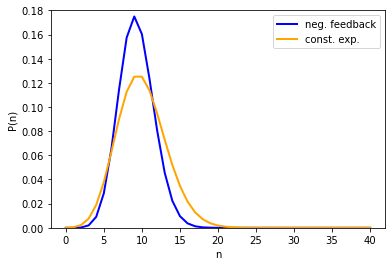

In [3]:
alpha_feedback = 55  
k = 2               
delta = 1           

alpha_const = 10
lambda_const = alpha_const / delta  

# Define maximum n value for calculation and plotting
n_max = 40
n_values = np.arange(0, n_max + 1)

# Calculation of P(n) for negative feedback
P_feedback = np.zeros(n_max + 1)
P_feedback[0] = 1  # Initial condition P(0)

for n in range(1, n_max + 1):
    C_n_feedback = alpha_feedback / (1 + n / k)
    D_n_feedback = delta * n                 
    P_feedback[n] = (C_n_feedback / D_n_feedback) * P_feedback[n - 1]

# Normalize P(n) for the negative feedback case
P_feedback /= np.sum(P_feedback)

# Calculation of P(n) for constitutive expression (Poisson distribution)
P_const = poisson.pmf(n_values, lambda_const)

# Plot both distributions

plt.plot(n_values, P_feedback, color='blue', linewidth=2, label='neg. feedback')  # Thicker blue line for negative feedback
plt.plot(n_values, P_const, color='orange', linewidth=2, label='const. exp.')     # Thicker orange line for constitutive expression
plt.xlabel("n")
plt.ylabel("P(n)")
plt.legend()
plt.ylim(0, 0.18) 
plt.show()


---

Compare **<span style="color:red">here</span>** the results of the constitutive expression and the negative feedback cases. Which one is more variable? Relate this result with the properties of the negative feedback discussed in class. 

If we look at the negative feedback (blue line), we observe a narrower and more sharp distribution, meaning that the population size varies less and is a bit more controlled. 

When looking at the constitutive Expression (orange line), we see a broader distribution with a lower peak meaning that it has more variability; the population size can take a wider range of values and vary more around the mean.  

One of the properties of negative feedback is to reduce variability in the population size in order to stabilize the system, reducing noise. It helps maintain the system closer to a desired state despite random fluctu

---

Finally, calculate the stationary probability density $P(n)$ of a birth-death process with cooperative positive feedback with leakiness (defined by $C(n)=\alpha_0+\frac{\alpha_p n^p}{k^p+n^p}$), with $\alpha_0 = 10$, $\alpha_p=75$, $p=4$, and $k=40$.

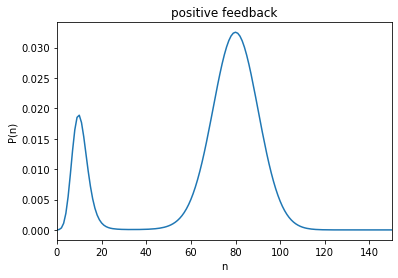

In [16]:
# Define parameters
alpha_0 = 10
alpha_p = 75
p = 4
k = 40
gamma = 1

# Cooperative feedback function C(n)
def cooperative_feedback(n, alpha_0, alpha_p, p, k):
    return alpha_0 + (alpha_p * n**p) / (k**p + n**p)

# Birth rate lambda(n) and death rate mu(n)
def lambda_n(n, alpha_0, alpha_p, p, k):
    return C(n, alpha_0, alpha_p, p, k)

def mu_n(n, gamma):
    return gamma * n

# Calculate the stationary probability distribution
def calculate_stationary_distribution(max_n, alpha_0, alpha_p, p, k, gamma):
    P = np.zeros(max_n + 1)    
    # Initial condition
    P[0] = 1
    
    # Find P(n) using the balance equation
    for n in range(1, max_n + 1):
        lambda_prev = lambda_n(n-1, alpha_0, alpha_p, p, k)
        mu_curr = mu_n(n, gamma)
        
        P[n] = (lambda_prev * P[n-1]) / mu_curr
    
    # Normalize the distribution so that sum(P(n)) = 1
    P /= np.sum(P)
    return P

# Maximum value of n
max_n = 150

# Calculate the stationary distribution
P = calculate_stationary_distribution(max_n, alpha_0, alpha_p, p, k, gamma)

n_values = np.arange(max_n + 1)
plt.plot(n_values, P, label=r'$P(n)$')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.title('positive feedback')
plt.xlim(0, 150)
plt.show()


---

<span style="color:red">Comment your result here.</span> In particular, relate this result with the properties of the positive feedback discussed in class. 

In our resulting plot, we can see that at low values of n, the feedback is weak and the rate increases slowly. And as n increases, the feedback accelerates birth leading to a peak (n = 0-20) in the distribution. Then, the system stabilizes due to the saturating nature of the feedback resulting in a stationary distrubtion until it peaks again between the n values of 60 and 100. 

These results reflect the nature of positive feedback processes, which promote growth up to a point of saturation where the system stabilizes. 

---